In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd

## Scraping

In [2]:
import time

In [6]:
driver = webdriver.Chrome()

In [7]:
driver.get('https://www.broadwayworld.com/grosses.cfm')

In [8]:
rows = []
# Looping through indexes of dates
for date in range(0,40):
    print("Starting to scrape a new week and its previous week!")
    # We need to open a new webdriver EVERY.TIME.
    # Because otherwise, the address by itself will just send us back to the page where we were at!
    # And not the page with the double dropdown
    driver = webdriver.Chrome()
    driver.get('https://www.broadwayworld.com/grosses.cfm')
    # If there's an add, get rid of it
    try:
        driver.find_element_by_partial_link_text('ADVERTISEMENT').click()
    except:
        pass
    # Select first dropdown
    time.sleep(6)
    dropdown_one= Select(driver.find_element_by_name('days'))
    # Select second dropdown
    dropdown_two= Select(driver.find_element_by_name('comparedays'))
    # Filling first dropdown with date
    dropdown_one.select_by_index(date)
    # Filling second dropdown
    # The previous date is at index + 1 - which is interesting
    # So basically, it works backwards!
    dropdown_two.select_by_index(date+1)
    # Clicking on the 'go' button
    go_button = driver.find_element_by_xpath('//*[@id="content"]/div/div/div/div/div/div/div/table/tbody/tr/td/div[1]/center/form/button').click()
    # No we are on a new page!
    # So it's EXACTLY what you have right now in your code
    # Let's look for the table containing all our stuff
    time.sleep(6)
    try:
        driver.find_element_by_partial_link_text('ADVERTISEMENT').click()
    except:
        pass
    #table = driver.find_elements_by_tag_name('table')[1]
    # Now let's find all the rows
    # You'll need to clean the "show" row in your final dataframe, but I think you've already done this
    shows = driver.find_elements_by_xpath('//*[@id="content"]/div/div/div/div/div/div/div/table/tbody/tr/td/table/tbody/tr')   
    
    # AND FINALLY THE SCRAPING
    for show in shows[1:-2]:
        # Putting a try/except just in case
        # But here this is your code, you know how it works.
        try:
            info = show.find_elements_by_tag_name('td')
            row={}
            
            # These two lines take care of the date!
            # The date for this week is inside an element with an easy to access class
            row['date_this_week'] = driver.find_element_by_class_name('portus-content-title').find_element_by_tag_name('h1').text
            row['date_previous_week'] = shows[0].find_elements_by_tag_name('td')[2].text
            
            # I just changed the header names to be more descriptive
            title = info[0]
            row['title_play'] = title.text
            
            current_week = info[1]
            row['current_week_gross'] = current_week.text
            
            previous_week = info[2]
            row['previous_week_gross'] = previous_week.text
            
            difference = info[3]
            row['difference_gross'] = difference.text
            
            avg_ticket = info[6]
            row['avg_ticket_for_this_week'] = avg_ticket.text
            
            top_ticket = info[7]
            row['top_ticket_for_this_week'] = top_ticket.text
            
            seats_sold = info[8]
            row['seats_sold_for_this_week'] = seats_sold.text
            
            seats_available = info[9]
            row['seats_available_for_this_week'] = seats_available.text
            
            pct_sold = info[11]
            row['pct_seats_sold_this_week'] = pct_sold.text
            
            pct_sold_previous = info[12]
            row['pct_seats_sold_previous_week'] = pct_sold_previous.text
            
            diff_sold = info[13]
            row['percentage_points_difference'] = diff_sold.text
            
            rows.append(row)
        except:
            pass
    # And we need to close our webdriver!
    # Because otherwise, we'll just open a million new webdrivers when increasing the range
    # So this is to ensure we only have one
    print("Done with a page!")
    driver.quit()

# Voilà
df = pd.DataFrame(rows)
df.tail(10)

Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starting to scrape a new week and its previous week!
Done with a page!
Starti

,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
1201,$94.50,"$860,806","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$-27,453",78.0%,74.8%,-3.20%,"$888,259","12,184","9,109",SCHOOL OF ROCK\nWINTER GARDEN,$248
1202,$502.40,"$2,376,370","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$451,552",100.0%,100.0%,0.00%,"$1,924,818","4,730","4,730",SPRINGSTEEN ON BROADWAY\nWALTER KERR,$850
1203,$104.15,"$872,163","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$103,249",100.0%,99.9%,-0.10%,"$768,914","8,384","8,374",THE BAND'S VISIT\nETHEL BARRYMORE,$277
1204,$143.69,"$1,251,643","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,$485,101.9%,102.1%,0.20%,"$1,251,158","8,528","8,711",THE BOOK OF MORMON\nEUGENE O'NEILL,$477
1205,$150.92,"$2,038,474","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$-40,895",100.0%,99.6%,-0.40%,"$2,079,369","13,568","13,507",THE LION KING\nMINSKOFF,$225
1206,$87.26,"$1,007,984","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$-82,464",92.9%,90.0%,-2.90%,"$1,090,448","12,840","11,551",THE PHANTOM OF THE OPERA\nMAJESTIC,$213
1207,$72.89,"$414,903","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$17,214",83.1%,83.3%,0.20%,"$397,689","6,832","5,692",THE PLAY THAT GOES WRONG\nLYCEUM,$197
1208,$58.80,"$367,634","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$71,518",76.8%,77.5%,0.70%,"$296,116","8,064","6,252",THE TERMS OF MY SURRENDER\nBELASCO,$247
1209,$73.72,"$356,265","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$61,755",91.7%,82.3%,-9.40%,"$294,510","5,872","4,833",TIME AND THE CONWAYS\nAMERICAN AIRLINES,$149
1210,$98.75,"$776,450","Oct 15, 2017\nGross",Broadway Grosses - Week Ending 10/22/2017,"$13,819",93.0%,94.1%,1.10%,"$762,631","8,360","7,863",WAITRESS\nBROOKS ATKINSON,$270


## Cleaning

In [64]:
df = pd.read_csv('season.csv')
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,$86.12,"$667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"$84,362",82.6%,92.8%,10.20%,"$582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,$225
1,1,$111.05,"$1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"$176,472",97.2%,97.7%,0.50%,"$1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,$228
2,2,$94.71,"$818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"$69,883",85.6%,94.5%,8.90%,"$748,121","9,144","8,637",ANASTASIA\r\r\r\nBROADHURST,$273
3,3,$101.06,"$736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"$-1,319",89.3%,88.8%,-0.50%,"$737,857","8,208","7,288",BEAUTIFUL\r\r\r\nSTEPHEN SONDHEIM,$247
4,4,$87.50,"$775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"$-90,528",79.5%,77.6%,-1.90%,"$866,092","11,424","8,864",CAROUSEL\r\r\r\nIMPERIAL,$323


In [116]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [117]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [65]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [66]:
df['avg_ticket_for_this_week'] = df['avg_ticket_for_this_week'].str.extract(r"(\d+.\d+)")
#df['avg_ticket']
df.head(1)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,86.12,"$667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"$84,362",82.6%,92.8%,10.20%,"$582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,$225


In [67]:
df['difference_gross'] = df['difference_gross'].str.replace('$',' ')
df.head(4)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,86.12,"$667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6%,92.8%,10.20%,"$582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,$225
1,1,111.05,"$1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2%,97.7%,0.50%,"$1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,$228
2,2,94.71,"$818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6%,94.5%,8.90%,"$748,121","9,144","8,637",ANASTASIA\r\r\r\nBROADHURST,$273
3,3,101.06,"$736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3%,88.8%,-0.50%,"$737,857","8,208","7,288",BEAUTIFUL\r\r\r\nSTEPHEN SONDHEIM,$247


In [68]:
df['difference_gross'] = df['difference_gross'].str.extract(r" (.*)")
df.head(4)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,86.12,"$667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6%,92.8%,10.20%,"$582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,$225
1,1,111.05,"$1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2%,97.7%,0.50%,"$1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,$228
2,2,94.71,"$818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6%,94.5%,8.90%,"$748,121","9,144","8,637",ANASTASIA\r\r\r\nBROADHURST,$273
3,3,101.06,"$736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3%,88.8%,-0.50%,"$737,857","8,208","7,288",BEAUTIFUL\r\r\r\nSTEPHEN SONDHEIM,$247


In [69]:
df['current_week_gross'] = df['current_week_gross'].str.extract(r"((\d+,.*))")
df['previous_week_gross'] = df['previous_week_gross'].str.extract(r"((\d+,.*))")
df.head(2)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6%,92.8%,10.20%,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,$225
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2%,97.7%,0.50%,"1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,$228


In [70]:
df['percentage_points_difference'] = df['percentage_points_difference'].str.extract(r"(.*)%")
df['pct_seats_sold_this_week'] = df['pct_seats_sold_this_week'].str.extract(r"(.*)%")
df['pct_seats_sold_previous_week'] = df['pct_seats_sold_previous_week'].str.extract(r"(.*)%")
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,$225
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,$228
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA\r\r\r\nBROADHURST,$273
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL\r\r\r\nSTEPHEN SONDHEIM,$247
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL\r\r\r\nIMPERIAL,$323


In [71]:
df['top_ticket_for_this_week'] = df['top_ticket_for_this_week'].str.extract(r"(\d+)")
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,225
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,228
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA\r\r\r\nBROADHURST,273
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL\r\r\r\nSTEPHEN SONDHEIM,247
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL\r\r\r\nIMPERIAL,323


In [72]:
df['theater'] = df['title_play'].str.extract(r"(.*)$")
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r\nLONGACRE,225,LONGACRE
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN\r\r\r\nNEW AMSTERDAM,228,NEW AMSTERDAM
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA\r\r\r\nBROADHURST,273,BROADHURST
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL\r\r\r\nSTEPHEN SONDHEIM,247,STEPHEN SONDHEIM
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL\r\r\r\nIMPERIAL,323,IMPERIAL


In [73]:
df['title_play'] = df['title_play'].str.replace("\n","$")
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL\r\r\r$LONGACRE,225,LONGACRE
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN\r\r\r$NEW AMSTERDAM,228,NEW AMSTERDAM
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA\r\r\r$BROADHURST,273,BROADHURST
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL\r\r\r$STEPHEN SONDHEIM,247,STEPHEN SONDHEIM
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL\r\r\r$IMPERIAL,323,IMPERIAL


In [74]:
df['title_play'] = df['title_play'].str.replace("\r"," ")
df.head(20)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL $LONGACRE,225,LONGACRE
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN $NEW AMSTERDAM,228,NEW AMSTERDAM
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA $BROADHURST,273,BROADHURST
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL $STEPHEN SONDHEIM,247,STEPHEN SONDHEIM
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL $IMPERIAL,323,IMPERIAL
5,5,85.86,"684,807","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"24,331",88.7,92.3,3.60,"660,476","8,640","7,976",CHICAGO $AMBASSADOR,187,AMBASSADOR
6,6,132.28,"1,129,233","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-18,292",102.0,102.0,0.00,"1,147,526","8,368","8,537",COME FROM AWAY $SCHOENFELD,347,SCHOENFELD
7,7,206.86,"1,653,882","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"1,684",101.6,101.6,0.00,"1,652,199","7,872","7,995",DEAR EVAN HANSEN $MUSIC BOX,448,MUSIC BOX
8,8,158.24,"2,103,866","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"16,229",98.6,98.7,0.10,"2,087,637","13,472","13,295",FROZEN $ST. JAMES,325,ST. JAMES
9,9,46.52,"229,555","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,NaN,"5,730","4,935",GETTIN' THE BAND BACK TOGETHER $BELASCO,198,BELASCO


In [75]:
df['title_play'] = df['title_play'].str.replace("\n","$")
df.head(20)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL $LONGACRE,225,LONGACRE
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN $NEW AMSTERDAM,228,NEW AMSTERDAM
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA $BROADHURST,273,BROADHURST
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL $STEPHEN SONDHEIM,247,STEPHEN SONDHEIM
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL $IMPERIAL,323,IMPERIAL
5,5,85.86,"684,807","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"24,331",88.7,92.3,3.60,"660,476","8,640","7,976",CHICAGO $AMBASSADOR,187,AMBASSADOR
6,6,132.28,"1,129,233","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-18,292",102.0,102.0,0.00,"1,147,526","8,368","8,537",COME FROM AWAY $SCHOENFELD,347,SCHOENFELD
7,7,206.86,"1,653,882","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"1,684",101.6,101.6,0.00,"1,652,199","7,872","7,995",DEAR EVAN HANSEN $MUSIC BOX,448,MUSIC BOX
8,8,158.24,"2,103,866","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"16,229",98.6,98.7,0.10,"2,087,637","13,472","13,295",FROZEN $ST. JAMES,325,ST. JAMES
9,9,46.52,"229,555","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,NaN,"5,730","4,935",GETTIN' THE BAND BACK TOGETHER $BELASCO,198,BELASCO


In [76]:
df['title_play'] = df['title_play'].str.extract(r"(.*)\$")
df.head(20)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL,225,LONGACRE
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN,228,NEW AMSTERDAM
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA,273,BROADHURST
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL,247,STEPHEN SONDHEIM
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL,323,IMPERIAL
5,5,85.86,"684,807","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"24,331",88.7,92.3,3.60,"660,476","8,640","7,976",CHICAGO,187,AMBASSADOR
6,6,132.28,"1,129,233","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-18,292",102.0,102.0,0.00,"1,147,526","8,368","8,537",COME FROM AWAY,347,SCHOENFELD
7,7,206.86,"1,653,882","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"1,684",101.6,101.6,0.00,"1,652,199","7,872","7,995",DEAR EVAN HANSEN,448,MUSIC BOX
8,8,158.24,"2,103,866","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"16,229",98.6,98.7,0.10,"2,087,637","13,472","13,295",FROZEN,325,ST. JAMES
9,9,46.52,"229,555","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,NaN,"5,730","4,935",GETTIN' THE BAND BACK TOGETHER,198,BELASCO


In [77]:
df.head(1)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL,225,LONGACRE


In [78]:
df['year'] = df['date_this_week'].str.extract(r"(\d\d\d\d)")
df['month'] = df['date_this_week'].str.extract(r"(\d+)/\d\d/\d\d\d\d")
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,"1,686,463","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"176,472",97.2,97.7,0.50,"1,509,991","15,543","15,187",ALADDIN,228,NEW AMSTERDAM,2018,7
2,2,94.71,"818,004","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"69,883",85.6,94.5,8.90,"748,121","9,144","8,637",ANASTASIA,273,BROADHURST,2018,7
3,3,101.06,"736,538","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-1,319",89.3,88.8,-0.50,"737,857","8,208","7,288",BEAUTIFUL,247,STEPHEN SONDHEIM,2018,7
4,4,87.50,"775,564","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"-90,528",79.5,77.6,-1.90,"866,092","11,424","8,864",CAROUSEL,323,IMPERIAL,2018,7


In [79]:
df.month.value_counts()

12    124
4     104
5     103
6      97
3      90
11     89
1      79
2      73
7      61
10     55
Name: month, dtype: int64

In [80]:
df.head(1)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,"667,360","Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,"84,362",82.6,92.8,10.20,"582,998","8,352","7,749",A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7


In [81]:
df['current_week_gross'] = df['current_week_gross'].str.replace(',','')
df['difference_gross'] = df['difference_gross'].str.replace(',','')
df['previous_week_gross'] = df['previous_week_gross'].str.replace(',','')
df['seats_available_for_this_week'] = df['seats_available_for_this_week'].str.replace(',','')
df['seats_sold_for_this_week'] = df['seats_sold_for_this_week'].str.replace(',','')
df.head(15)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,667360,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,84362,82.6,92.8,10.20,582998,8352,7749,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,1686463,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,176472,97.2,97.7,0.50,1509991,15543,15187,ALADDIN,228,NEW AMSTERDAM,2018,7
2,2,94.71,818004,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,69883,85.6,94.5,8.90,748121,9144,8637,ANASTASIA,273,BROADHURST,2018,7
3,3,101.06,736538,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-1319,89.3,88.8,-0.50,737857,8208,7288,BEAUTIFUL,247,STEPHEN SONDHEIM,2018,7
4,4,87.50,775564,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-90528,79.5,77.6,-1.90,866092,11424,8864,CAROUSEL,323,IMPERIAL,2018,7
5,5,85.86,684807,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,24331,88.7,92.3,3.60,660476,8640,7976,CHICAGO,187,AMBASSADOR,2018,7
6,6,132.28,1129233,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-18292,102.0,102.0,0.00,1147526,8368,8537,COME FROM AWAY,347,SCHOENFELD,2018,7
7,7,206.86,1653882,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,1684,101.6,101.6,0.00,1652199,7872,7995,DEAR EVAN HANSEN,448,MUSIC BOX,2018,7
8,8,158.24,2103866,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,16229,98.6,98.7,0.10,2087637,13472,13295,FROZEN,325,ST. JAMES,2018,7
9,9,46.52,229555,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,NaN,5730,4935,GETTIN' THE BAND BACK TOGETHER,198,BELASCO,2018,7


In [82]:
# df['month'].replace('7','Jul',inplace=True)
# df['month'].replace('6','Jun',inplace=True)
# df['month'].replace('5','May',inplace=True)
# df['month'].replace('4','Apr',inplace=True)
# df['month'].replace('3','Mar',inplace=True)
# df['month'].replace('2','Feb',inplace=True)
# df['month'].replace('1','Jan',inplace=True)
# df['month'].replace('12','Dec',inplace=True)
# df['month'].replace('11','Nov',inplace=True)
# df['month'].replace('10','Oct',inplace=True)

In [83]:
df.head(20)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,667360,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,84362,82.6,92.8,10.20,582998,8352,7749,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,1686463,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,176472,97.2,97.7,0.50,1509991,15543,15187,ALADDIN,228,NEW AMSTERDAM,2018,7
2,2,94.71,818004,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,69883,85.6,94.5,8.90,748121,9144,8637,ANASTASIA,273,BROADHURST,2018,7
3,3,101.06,736538,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-1319,89.3,88.8,-0.50,737857,8208,7288,BEAUTIFUL,247,STEPHEN SONDHEIM,2018,7
4,4,87.50,775564,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-90528,79.5,77.6,-1.90,866092,11424,8864,CAROUSEL,323,IMPERIAL,2018,7
5,5,85.86,684807,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,24331,88.7,92.3,3.60,660476,8640,7976,CHICAGO,187,AMBASSADOR,2018,7
6,6,132.28,1129233,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-18292,102.0,102.0,0.00,1147526,8368,8537,COME FROM AWAY,347,SCHOENFELD,2018,7
7,7,206.86,1653882,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,1684,101.6,101.6,0.00,1652199,7872,7995,DEAR EVAN HANSEN,448,MUSIC BOX,2018,7
8,8,158.24,2103866,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,16229,98.6,98.7,0.10,2087637,13472,13295,FROZEN,325,ST. JAMES,2018,7
9,9,46.52,229555,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,NaN,5730,4935,GETTIN' THE BAND BACK TOGETHER,198,BELASCO,2018,7


In [84]:
df.dtypes

Unnamed: 0                        int64
avg_ticket_for_this_week         object
current_week_gross               object
date_previous_week               object
date_this_week                   object
difference_gross                 object
pct_seats_sold_previous_week     object
pct_seats_sold_this_week         object
percentage_points_difference     object
previous_week_gross              object
seats_available_for_this_week    object
seats_sold_for_this_week         object
title_play                       object
top_ticket_for_this_week         object
theater                          object
year                             object
month                            object
dtype: object

In [85]:
df['current_week_gross'] = df.current_week_gross.fillna(0)
df['current_week_gross'] = df.current_week_gross.astype(int)

# df['difference'] = df.difference.fillna(0)
# df['difference'] = df.difference.astype(int)

df['previous_week_gross'] = df.previous_week_gross.fillna(0)
df['previous_week_gross'] = df.previous_week_gross.astype(int)

# df['seats_available'] = df.seats_available.fillna(0)
# df['seats_available'] = df['seats_available'].astype(int)

# df['seats_sold'] = df.seats_sold.fillna(0)
# df['seats_sold'] = df['seats_sold'].astype(int)

df['top_ticket_for_this_week'] = df['top_ticket_for_this_week'].fillna(0)
df['top_ticket_for_this_week'] = df['top_ticket_for_this_week'].astype(int)

df.head(2)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,667360,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,84362,82.6,92.8,10.20,582998,8352,7749,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,1686463,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,176472,97.2,97.7,0.50,1509991,15543,15187,ALADDIN,228,NEW AMSTERDAM,2018,7


In [86]:
df.dtypes

Unnamed: 0                        int64
avg_ticket_for_this_week         object
current_week_gross                int32
date_previous_week               object
date_this_week                   object
difference_gross                 object
pct_seats_sold_previous_week     object
pct_seats_sold_this_week         object
percentage_points_difference     object
previous_week_gross               int32
seats_available_for_this_week    object
seats_sold_for_this_week         object
title_play                       object
top_ticket_for_this_week          int32
theater                          object
year                             object
month                            object
dtype: object

In [87]:
df['avg_ticket_for_this_week'] = df['avg_ticket_for_this_week'].astype(float)
df['percentage_points_difference'] = df['percentage_points_difference'].astype(float)
df['pct_seats_sold_this_week'] = df['pct_seats_sold_this_week'].astype(float)
df['pct_seats_sold_previous_week'] = df['pct_seats_sold_previous_week'].astype(float)
df['current_week_gross'] = df['current_week_gross'].astype(int)
#df['difference_gross'] = df['difference_gross'].astype(int)
df['previous_week_gross'] = df['previous_week_gross'].astype(int)
#df['seats_available'] = df['seats_available'].astype(int)
#df['seats_sold'] = df['seats_sold'].astype(int)
#df['top_ticket'] = df['top_ticket'].astype(int)

df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                  object
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week     object
seats_sold_for_this_week          object
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [88]:
# df['difference_gross'] = df.difference_gross.fillna(0)
# df['difference_gross'] = df.difference_gross.astype(int)

In [89]:
# df = df.dropna(thresh=10)
# df

In [90]:
df

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,667360,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,84362,82.6,92.8,10.2,582998,8352,7749,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,1686463,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,176472,97.2,97.7,0.5,1509991,15543,15187,ALADDIN,228,NEW AMSTERDAM,2018,7
2,2,94.71,818004,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,69883,85.6,94.5,8.9,748121,9144,8637,ANASTASIA,273,BROADHURST,2018,7
3,3,101.06,736538,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-1319,89.3,88.8,-0.5,737857,8208,7288,BEAUTIFUL,247,STEPHEN SONDHEIM,2018,7
4,4,87.50,775564,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-90528,79.5,77.6,-1.9,866092,11424,8864,CAROUSEL,323,IMPERIAL,2018,7
5,5,85.86,684807,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,24331,88.7,92.3,3.6,660476,8640,7976,CHICAGO,187,AMBASSADOR,2018,7
6,6,132.28,1129233,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-18292,102.0,102.0,0.0,1147526,8368,8537,COME FROM AWAY,347,SCHOENFELD,2018,7
7,7,206.86,1653882,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,1684,101.6,101.6,0.0,1652199,7872,7995,DEAR EVAN HANSEN,448,MUSIC BOX,2018,7
8,8,158.24,2103866,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,16229,98.6,98.7,0.1,2087637,13472,13295,FROZEN,325,ST. JAMES,2018,7
9,9,46.52,229555,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,0,5730,4935,GETTIN' THE BAND BACK TOGETHER,198,BELASCO,2018,7


In [91]:
df = df[df.seats_available_for_this_week != 'Seats\r\r\r\nSold']
df

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,667360,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,84362,82.6,92.8,10.2,582998,8352,7749,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,1686463,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,176472,97.2,97.7,0.5,1509991,15543,15187,ALADDIN,228,NEW AMSTERDAM,2018,7
2,2,94.71,818004,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,69883,85.6,94.5,8.9,748121,9144,8637,ANASTASIA,273,BROADHURST,2018,7
3,3,101.06,736538,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-1319,89.3,88.8,-0.5,737857,8208,7288,BEAUTIFUL,247,STEPHEN SONDHEIM,2018,7
4,4,87.50,775564,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-90528,79.5,77.6,-1.9,866092,11424,8864,CAROUSEL,323,IMPERIAL,2018,7
5,5,85.86,684807,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,24331,88.7,92.3,3.6,660476,8640,7976,CHICAGO,187,AMBASSADOR,2018,7
6,6,132.28,1129233,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-18292,102.0,102.0,0.0,1147526,8368,8537,COME FROM AWAY,347,SCHOENFELD,2018,7
7,7,206.86,1653882,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,1684,101.6,101.6,0.0,1652199,7872,7995,DEAR EVAN HANSEN,448,MUSIC BOX,2018,7
8,8,158.24,2103866,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,16229,98.6,98.7,0.1,2087637,13472,13295,FROZEN,325,ST. JAMES,2018,7
9,9,46.52,229555,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,NaN,NaN,86.1,NaN,0,5730,4935,GETTIN' THE BAND BACK TOGETHER,198,BELASCO,2018,7


In [92]:
df['seats_available_for_this_week'] = df.seats_available_for_this_week.fillna(0)
df['seats_available_for_this_week'] = df['seats_available_for_this_week'].astype(int)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                  object
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week      int32
seats_sold_for_this_week          object
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [94]:
df['seats_sold_for_this_week'] = df.seats_sold_for_this_week.fillna(0)
df['seats_sold_for_this_week'] = df['seats_sold_for_this_week'].astype(int)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                  object
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week      int32
seats_sold_for_this_week           int32
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [96]:
df['difference_gross'] = df.difference_gross.fillna(0)
df['difference_gross'] = df.difference_gross.astype(int)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                   int32
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week      int32
seats_sold_for_this_week           int32
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [98]:
df

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
0,0,86.12,667360,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,84362,82.6,92.8,10.2,582998,8352,7749,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,7
1,1,111.05,1686463,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,176472,97.2,97.7,0.5,1509991,15543,15187,ALADDIN,228,NEW AMSTERDAM,2018,7
2,2,94.71,818004,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,69883,85.6,94.5,8.9,748121,9144,8637,ANASTASIA,273,BROADHURST,2018,7
3,3,101.06,736538,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-1319,89.3,88.8,-0.5,737857,8208,7288,BEAUTIFUL,247,STEPHEN SONDHEIM,2018,7
4,4,87.50,775564,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-90528,79.5,77.6,-1.9,866092,11424,8864,CAROUSEL,323,IMPERIAL,2018,7
5,5,85.86,684807,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,24331,88.7,92.3,3.6,660476,8640,7976,CHICAGO,187,AMBASSADOR,2018,7
6,6,132.28,1129233,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,-18292,102.0,102.0,0.0,1147526,8368,8537,COME FROM AWAY,347,SCHOENFELD,2018,7
7,7,206.86,1653882,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,1684,101.6,101.6,0.0,1652199,7872,7995,DEAR EVAN HANSEN,448,MUSIC BOX,2018,7
8,8,158.24,2103866,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,16229,98.6,98.7,0.1,2087637,13472,13295,FROZEN,325,ST. JAMES,2018,7
9,9,46.52,229555,"Jul 15, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/22/2018,0,NaN,86.1,NaN,0,5730,4935,GETTIN' THE BAND BACK TOGETHER,198,BELASCO,2018,7


In [198]:
#Let's drop October
df = df[df.month != '10']
df = df[df.month != '7']
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
61,61,80.61,524500,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-18682,77.7,77.9,0.2,543182,8352,6507,A BRONX TALE THE MUSICAL,225,LONGACRE,2018,NaN
62,62,116.35,1601459,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,68009,98.7,99.6,0.9,1533450,13816,13764,ALADDIN,216,NEW AMSTERDAM,2018,NaN
63,63,95.59,764872,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-23952,86.5,87.5,1.0,788824,9144,8002,ANASTASIA,273,BROADHURST,2018,NaN
64,64,108.22,912838,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-226998,94.0,98.9,4.9,1139835,8532,8435,ANGELS IN AMERICA,247,NEIL SIMON,2018,NaN
65,65,95.09,674540,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-38767,84.9,86.4,1.5,713307,8208,7094,BEAUTIFUL,247,STEPHEN SONDHEIM,2018,NaN


## Analysis and graphs

### Constantly sold out

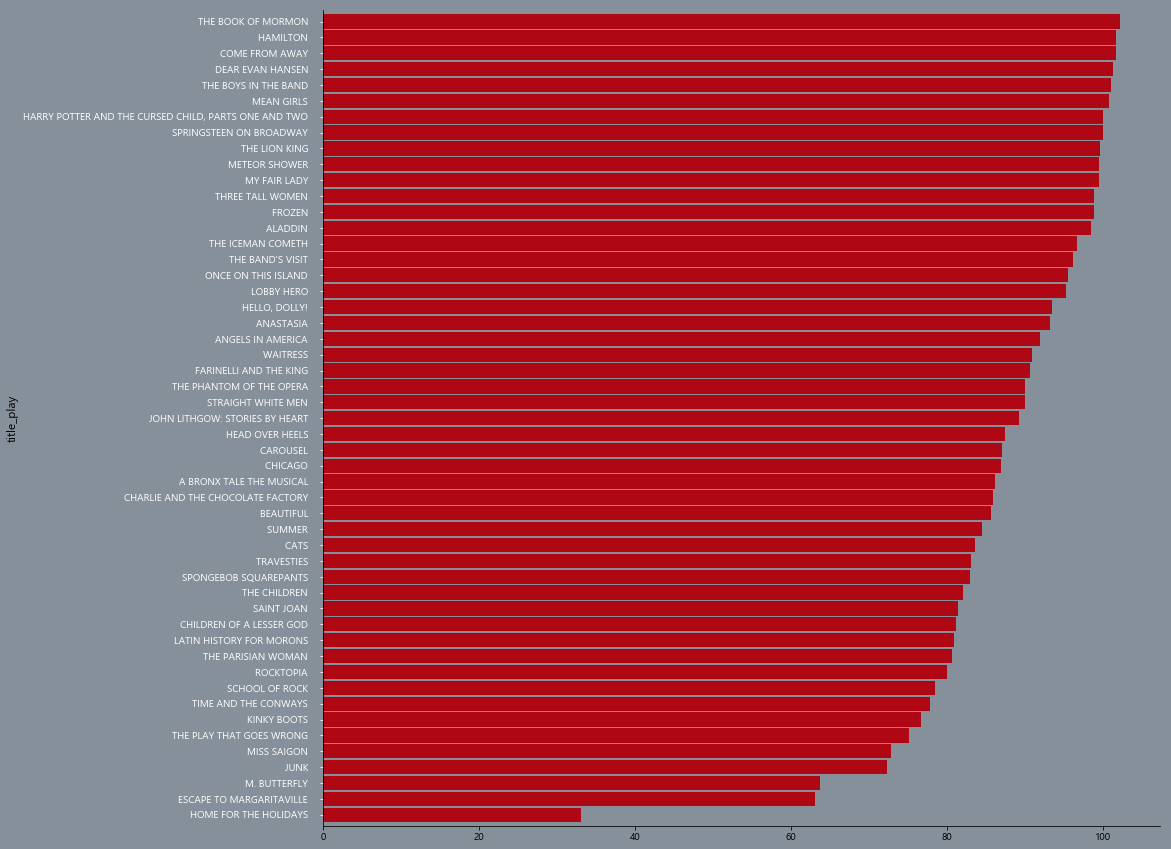

In [199]:
avg_seats_sold = df.groupby('title_play').pct_seats_sold_this_week.mean().sort_values(ascending=True)
avg_seats_sold.plot(kind='barh',figsize=(15,15),width=0.9)

In [200]:
top = df.sort_values(by='top_ticket_for_this_week',ascending=False)
top.head(40)

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
1021,1021,217.59,2478968,"Nov 26, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 12/3/2017,10793,100.8,98.5,-2.3,2468175,11568,11393,"HELLO, DOLLY!",996,SHUBERT,2017,NaN
1050,1050,211.68,2468175,"Nov 19, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 11/26/2017,149965,96.8,100.8,4.0,2318210,11568,11660,"HELLO, DOLLY!",996,SHUBERT,2017,11
960,960,212.55,2448611,"Dec 10, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 12/17/2017,-70845,99.9,99.6,-0.3,2519456,11568,11520,"HELLO, DOLLY!",996,SHUBERT,2017,12
991,991,218.00,2519456,"Dec 3, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 12/10/2017,40488,98.5,99.9,1.4,2478968,11568,11557,"HELLO, DOLLY!",996,SHUBERT,2017,12
841,841,236.78,2436208,"Jan 7, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 1/14/2018,230038,100.3,101.6,1.3,2206170,10122,10289,"HELLO, DOLLY!",996,SHUBERT,2018,1
869,869,190.09,2206170,"Dec 31, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 1/7/2018,-258403,101.1,100.3,-0.8,2464573,11568,11606,"HELLO, DOLLY!",996,SHUBERT,2018,NaN
929,929,199.02,2295082,"Dec 17, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 12/24/2017,-153529,99.6,99.7,0.1,2448611,11568,11532,"HELLO, DOLLY!",996,SHUBERT,2017,12
898,898,210.76,2464573,"Dec 24, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 12/31/2017,169491,99.7,101.1,1.4,2295082,11568,11694,"HELLO, DOLLY!",996,SHUBERT,2017,12
208,208,506.77,2402103,"Jun 3, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 6/10/2018,472655,100.0,100.0,0.0,1929448,4740,4740,SPRINGSTEEN ON BROADWAY,850,WALTER KERR,2018,6
1062,1062,504.94,2393435,"Nov 19, 2017\r\r\r\nGross",Broadway Grosses - Week Ending 11/26/2017,-8118,100.0,100.0,0.0,2401553,4740,4740,SPRINGSTEEN ON BROADWAY,850,WALTER KERR,2017,11


In [201]:
# top = df[['title_show']]

# df.groupby('title_play').top_ticket_for_this_week.value_counts().unstack().reset_index().fillna(0)
# df.tail(10)

In [202]:
#plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#AF0714']),
    'axes.facecolor': '#86909A',
    'savefig.facecolor': '#86909A',
    'figure.facecolor': '#86909A',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': 'black',
    'ytick.color':'white',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'white'
     })


In [203]:
df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                   int32
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week      int32
seats_sold_for_this_week           int32
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [204]:
# df['month'] = df['month'].str.replace('Jul','7')
# df['month'] = df['month'].str.replace('Jun','6')
# df['month'] = df['month'].str.replace('May','5')
# df['month'] = df['month'].str.replace('Apr','4')
# df['month'] = df['month'].str.replace('Mar','3')
# df['month'] = df['month'].str.replace('Feb','2')
# df['month'] = df['month'].str.replace('Jan','1')
# df['month'] = df['month'].str.replace('Dec','12')
# df['month'] = df['month'].str.replace('Nov','11')
# df['month'] = df['month'].str.replace('Oct','10')

In [205]:
df.month.value_counts()

12    120
4     101
5     100
6      94
3      87
11     86
1      76
2      70
Name: month, dtype: int64

In [218]:
field = "month"
month_order = ["11", "12", "1", "2", "3", "4", "5",'6']

In [219]:
months = df.groupby('month').seats_sold_for_this_week.sum().reset_index()
months

,month,seats_sold_for_this_week
0,1,618444
1,11,696893
2,12,978878
3,2,571428
4,3,734596
5,4,865580
6,5,859581
7,6,828124


In [224]:
months = months.set_index("month").loc[month_order]
months

,seats_sold_for_this_week
month,
11,696893
12,978878
1,618444
2,571428
3,734596
4,865580
5,859581
6,828124


In [264]:
plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#DF2860']),
    'pdf.fonttype':42,
    'axes.facecolor': '#EDEDED',  #FBD008, #FFA221
    'savefig.facecolor': '#EDEDED', 
    'figure.facecolor': '#EDEDED', ##35324 #9D2E01
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid':True,
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#000000',
    'ytick.color':'#000000',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':14,
    'text.color':'#000000'
     })

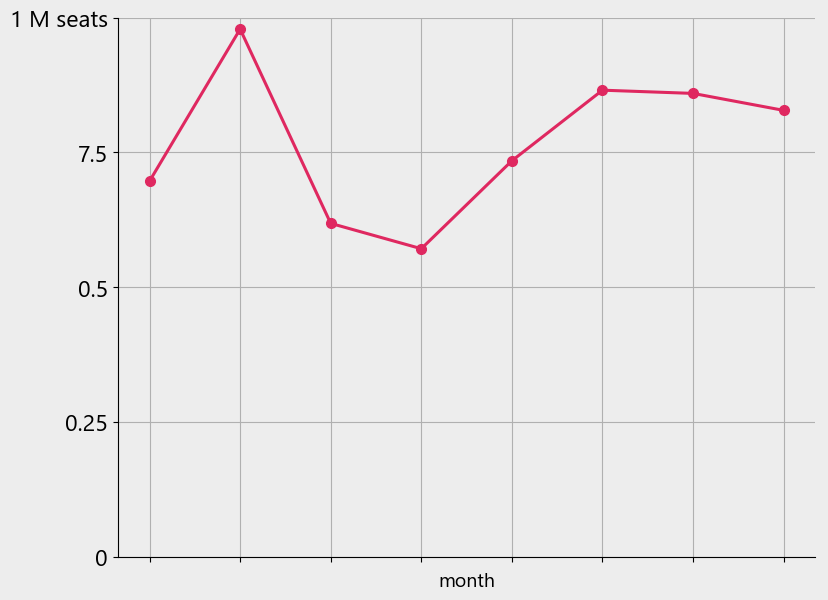

In [275]:
ax = months.seats_sold_for_this_week.plot(kind='line',y='month',marker='o', markersize=7, linewidth=2.2,figsize=(9,7))

ax.set_yticks([0,250000,500000,750000,1000000])
ax.set_yticklabels(['0','0.25','0.5','7.5','1 M seats'],color='#000000')

plt.savefig('months.pdf')
plt.show()

# ax.set_xticks([11,12,1,2,3,4,5,6])
# ax.set_yticklabels(['Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'],color='#000000')

In [108]:
df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                   int32
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week      int32
seats_sold_for_this_week           int32
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [195]:
monthly_grosses = df[['month','current_week_gross','title_play','theater']]
monthly_grosses

,month,current_week_gross,title_play,theater
0,7,667360,A BRONX TALE THE MUSICAL,LONGACRE
1,7,1686463,ALADDIN,NEW AMSTERDAM
2,7,818004,ANASTASIA,BROADHURST
3,7,736538,BEAUTIFUL,STEPHEN SONDHEIM
4,7,775564,CAROUSEL,IMPERIAL
5,7,684807,CHICAGO,AMBASSADOR
6,7,1129233,COME FROM AWAY,SCHOENFELD
7,7,1653882,DEAR EVAN HANSEN,MUSIC BOX
8,7,2103866,FROZEN,ST. JAMES
9,7,229555,GETTIN' THE BAND BACK TOGETHER,BELASCO


In [196]:
# field = "month"
# day_order = ["11", "12", "1", "2", "3", "4", "5",'6','7']
# ax = df.set_index("month").loc[day_order].plot(kind="bar", legend=False)
# #ax.set_ylabel("current_week_gross")


# #df.groupby('month').current_week_gross.sum().plot(kind='line',x='title')

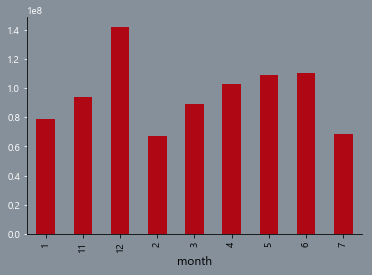

In [197]:
df.groupby('month').current_week_gross.sum().plot(kind='bar',x='title')

In [164]:
df.groupby('title_play').current_week_gross.sum().mean()

22874197.01818182

In [179]:
test = df.groupby('title_play').current_week_gross.sum().sort_values().reset_index().fillna(0)
test.head()

,title_play,current_week_gross
0,GETTIN' THE BAND BACK TOGETHER,229555
1,PRETTY WOMAN: THE MUSICAL,328854
2,THE TERMS OF MY SURRENDER,367634
3,HOME FOR THE HOLIDAYS,481817
4,PRINCE OF BROADWAY,582628


In [175]:
test2 = df.groupby('month').current_week_gross.sum().reset_index().fillna(0)
test2

,month,current_week_gross
0,1,79129260
1,10,54843334
2,11,94000579
3,12,141913555
4,2,66958685
5,3,88849205
6,4,102748076
7,5,109046521
8,6,110603691
9,7,68801835


In [174]:
#test.plot(kind='area')

In [276]:
df['title_play'] = df['title_play'].str.lower()
df['title_play']

61                            a bronx tale the musical   
62                                             aladdin   
63                                           anastasia   
64                                   angels in america   
65                                           beautiful   
66                                            carousel   
67                                             chicago   
68                                      come from away   
69                                    dear evan hansen   
70                                              frozen   
71                                            hamilton   
72      harry potter and the cursed child, parts one a...
73                                     head over heels   
74                                       hello, dolly!   
76                                         kinky boots   
77                                          mean girls   
78                                        my fair lady   
79            

In [277]:
df['title_play'] = df['title_play'].str.title()
df['title_play']

61                            A Bronx Tale The Musical   
62                                             Aladdin   
63                                           Anastasia   
64                                   Angels In America   
65                                           Beautiful   
66                                            Carousel   
67                                             Chicago   
68                                      Come From Away   
69                                    Dear Evan Hansen   
70                                              Frozen   
71                                            Hamilton   
72      Harry Potter And The Cursed Child, Parts One A...
73                                     Head Over Heels   
74                                       Hello, Dolly!   
76                                         Kinky Boots   
77                                          Mean Girls   
78                                        My Fair Lady   
79            

In [299]:
df['title_play'] = df.title_play.str.replace('Harry Potter And The Cursed Child, Parts One And Two','Harry Potter')
df.head()

,Unnamed: 0,avg_ticket_for_this_week,current_week_gross,date_previous_week,date_this_week,difference_gross,pct_seats_sold_previous_week,pct_seats_sold_this_week,percentage_points_difference,previous_week_gross,seats_available_for_this_week,seats_sold_for_this_week,title_play,top_ticket_for_this_week,theater,year,month
61,61,80.61,524500,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-18682,77.7,77.9,0.2,543182,8352,6507,A Bronx Tale The Musical,225,LONGACRE,2018,NaN
62,62,116.35,1601459,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,68009,98.7,99.6,0.9,1533450,13816,13764,Aladdin,216,NEW AMSTERDAM,2018,NaN
63,63,95.59,764872,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-23952,86.5,87.5,1.0,788824,9144,8002,Anastasia,273,BROADHURST,2018,NaN
64,64,108.22,912838,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-226998,94.0,98.9,4.9,1139835,8532,8435,Angels In America,247,NEIL SIMON,2018,NaN
65,65,95.09,674540,"Jul 1, 2018\r\r\r\nGross",Broadway Grosses - Week Ending 7/8/2018,-38767,84.9,86.4,1.5,713307,8208,7094,Beautiful,247,STEPHEN SONDHEIM,2018,NaN


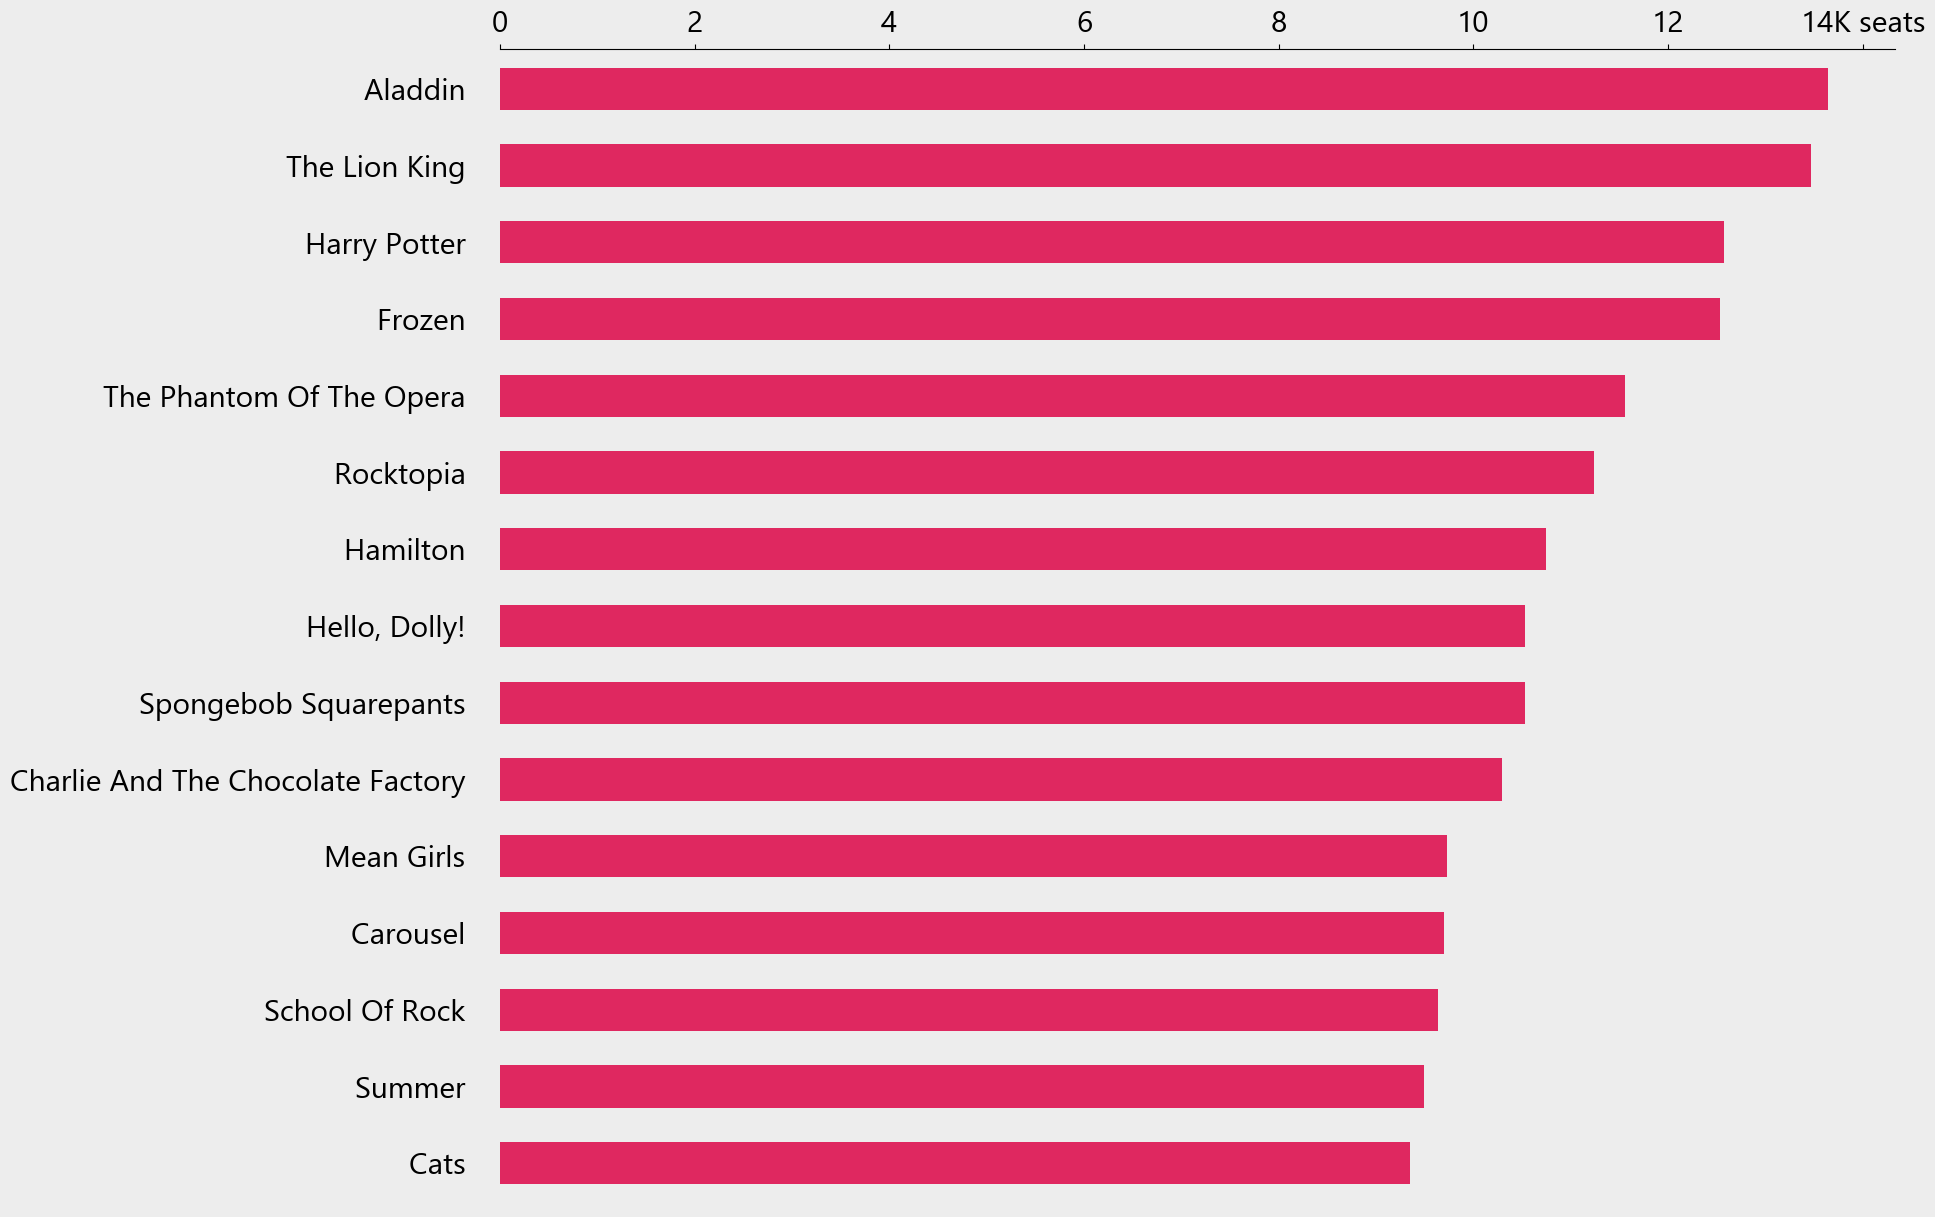

In [335]:
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#DF2860']),
    'pdf.fonttype':42,
    'axes.facecolor': '#EDEDED',  #FBD008, #FFA221
    'savefig.facecolor': '#EDEDED', 
    'figure.facecolor': '#EDEDED', ##35324 #9D2E01
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    'axes.grid':False,
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#000000',
    'ytick.color':'#000000',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':18,
    'text.color':'#000000'
     })

ax = df.groupby('title_play').seats_sold_for_this_week.mean().sort_values().tail(15).plot(kind='barh',x='title',figsize=(18,15),width=0.55)

ax.set_xticks([0,2000,4000,6000,8000,10000,12000,14000])
ax.set_xticklabels(['0','2','4','6','8','10','12','14K seats'],color='#000000')

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True, # ticks along the top edge are off
      labelbottom=False,
      labeltop=True)

plt.tick_params(
      axis='y',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      left = False,
      top=True, # ticks along the top edge are off
      labelbottom=False,
      labeltop=False) # labels along the bottom edge are off

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)


plt.savefig("avg_seats_sold_season_top15.pdf")
plt.savefig("avg_seats_sold_season_top15.png")
plt.show()

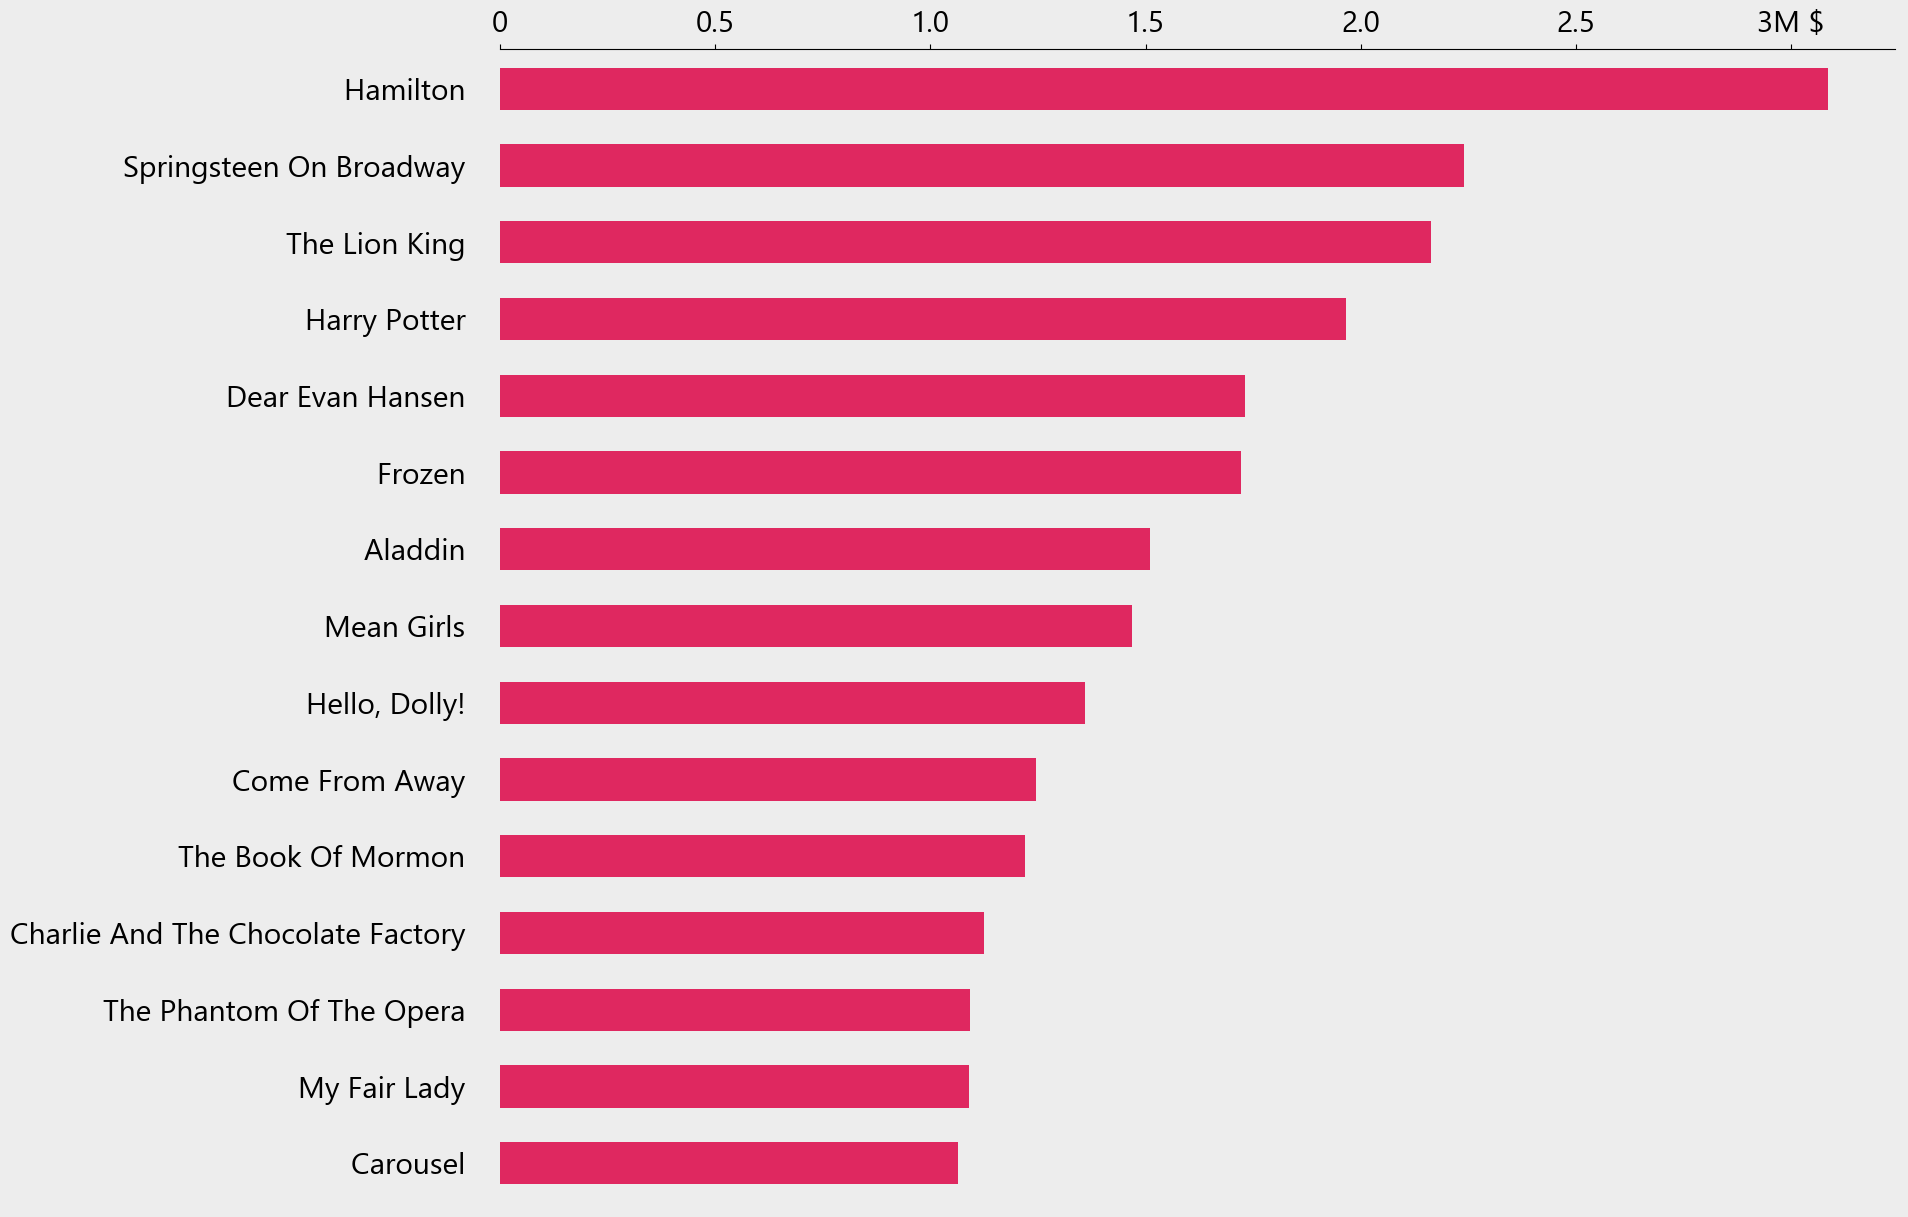

In [336]:
ax = df.groupby('title_play').current_week_gross.mean().sort_values().tail(15).plot(kind='barh',x='title',figsize=(18,15),width=0.55)

ax.set_xticks([0,500000,1000000,1500000,2000000,2500000,3000000])
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3M $'],color='#000000')

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True, # ticks along the top edge are off
      labelbottom=False,
      labeltop=True)

plt.tick_params(
      axis='y',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      left = False,
      top=True, # ticks along the top edge are off
      labelbottom=False,
      labeltop=False) # labels along the bottom edge are off

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

plt.savefig("gross_mean_season.pdf")
plt.savefig("gross_mean_season.png")
plt.show()

In [192]:
#df.groupby('title_play').current_week_gross.sum().sort_values().plot(kind='barh',x='title',color=bar_colors,figsize=(10,10))

In [347]:
df.groupby('theater').current_week_gross.sum().mean()

29088094.025641024

In [370]:
df.groupby('theater').current_week_gross.sum().sort_values()

theater
BROOKS ATKINSON            900167
CORT                      3358093
FRIEDMAN                  4522654
HAYES                     5225806
AMERICAN AIRLINES         9528070
HUDSON                   10483895
BELASCO                  12193852
STUDIO 54                12281554
MARQUIS                  12444605
LYCEUM                   13292273
JACOBS                   13484531
BROADWAY                 13524580
GOLDEN                   13906152
CIRCLE IN THE SQUARE     18570103
IMPERIAL                 20213517
BOOTH                    20759386
VIVIAN BEAUMONT          23237633
AMBASSADOR               24103509
LONGACRE                 24847510
AUGUST WILSON            25432986
NEIL SIMON               26176922
LUNT-FONTANNE            27011813
STEPHEN SONDHEIM         27204156
PALACE                   27666519
AL HIRSCHFELD            29419195
LYRIC                    31468647
WINTER GARDEN            32660261
BROADHURST               33600897
ST. JAMES                34415050
ETHEL 

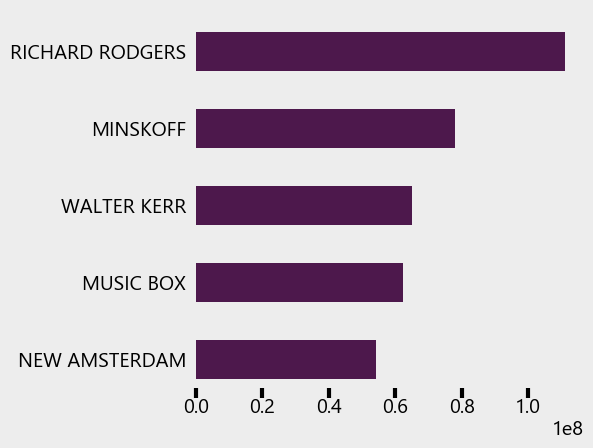

In [365]:
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#DF2860']),
    'pdf.fonttype':42,
    'axes.facecolor': '#EDEDED',  #FBD008, #FFA221
    'savefig.facecolor': '#EDEDED', 
    'figure.facecolor': '#EDEDED', ##35324 #9D2E01
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid':False,
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
#     'xtick.top': False,
#     'xtick.bottom': True,
#     'xtick.color': '#000000',
#     'ytick.color':'#000000',
   # 'ytick.bottom': False,
    'ytick.color': 'black',
#     'xtick.major.size': 7,
#     'xtick.major.width': 3,
#     'xtick.major.pad': 0,
#     'xtick.direction': 'in',
#     'xtick.labelsize': 'large',
#     'ytick.labelsize': 'large',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#000000'
     })

ax = df.groupby('theater').current_week_gross.sum().sort_values().tail(5).plot(kind='barh',color='#4D184C',figsize=(5,5))

# ax.set_xticks([0,2000,4000,6000,8000,10000,12000,14000])
# ax.set_xticklabels(['0','2','4','6','8','10','12','14K seats'],color='#000000')

# plt.tick_params(
#       axis='x',          # changes apply to the x-axis
#       which='major',      # both major and minor ticks are affected
#       bottom=False,      # ticks along the bottom edge are off
#       top=True, # ticks along the top edge are off
#       labelbottom=False,
#       labeltop=True)

plt.tick_params(
      axis='y',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      left = False,
      top=False, # ticks along the top edge are off
      labelbottom=False,
      labeltop=False) # labels along the bottom edge are off

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig("theater_grosses.pdf")
plt.savefig("theater_grosses.png")
plt.show()

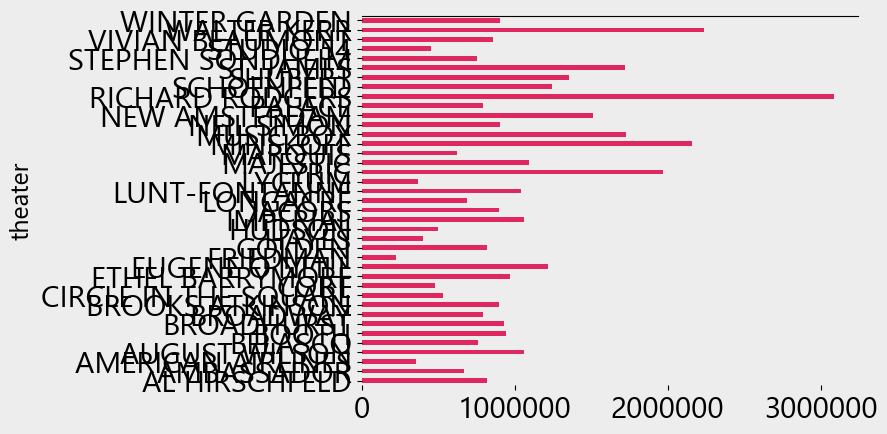

In [359]:
df.groupby('theater').current_week_gross.mean().plot(kind='barh',x='title')

In [133]:
#df.groupby(['theater','month']).current_week_gross.mean().plot(kind='barh',x='title')

In [137]:
df.current_week_gross.sum().mean()

1258080836.0

In [121]:
grosses = df.groupby(['month','title_play']).current_week_gross.sum().unstack().reset_index()
grosses

title_play,month,A BRONX TALE THE MUSICAL,ALADDIN,ANASTASIA,ANGELS IN AMERICA,BEAUTIFUL,CAROUSEL,CATS,CHARLIE AND THE CHOCOLATE FACTORY,CHICAGO,...,THE ICEMAN COMETH,THE LION KING,THE PARISIAN WOMAN,THE PHANTOM OF THE OPERA,THE PLAY THAT GOES WRONG,THE TERMS OF MY SURRENDER,THREE TALL WOMEN,TIME AND THE CONWAYS,TRAVESTIES,WAITRESS
0,1,2304377.0,4009455.0,2854713.0,NaN,2260294.0,NaN,NaN,1234419.0,1831744.0,...,NaN,5593355.0,1389879.0,2559837.0,1100127.0,NaN,NaN,NaN,NaN,NaN
1,10,1566411.0,2818757.0,1721429.0,NaN,1857692.0,NaN,1433222.0,1445178.0,1249681.0,...,NaN,4057840.0,NaN,1919447.0,791759.0,367634.0,NaN,677705.0,NaN,1503845.0
2,11,2481925.0,4823129.0,3042094.0,NaN,2644584.0,NaN,2569254.0,3221910.0,1916761.0,...,NaN,6317792.0,2104622.0,3118283.0,1335660.0,NaN,NaN,906678.0,NaN,NaN
3,12,3676387.0,7463271.0,5159944.0,NaN,3697346.0,NaN,4702241.0,5100666.0,3033510.0,...,NaN,10424867.0,2615293.0,5317322.0,1938486.0,NaN,NaN,NaN,NaN,NaN
4,2,2098338.0,4155362.0,2709636.0,322034.0,2065314.0,NaN,NaN,NaN,1812426.0,...,NaN,5730498.0,1313375.0,2786037.0,981293.0,NaN,NaN,NaN,NaN,NaN
5,3,1845603.0,4150191.0,2770508.0,2338681.0,1996875.0,3016929.0,NaN,NaN,1969178.0,...,391717.0,5871543.0,467853.0,3228540.0,993213.0,NaN,1721054.0,NaN,NaN,NaN
6,4,1776505.0,4260561.0,2455601.0,2774311.0,2145237.0,3626825.0,NaN,NaN,2055887.0,...,2533286.0,6388001.0,NaN,3146377.0,940726.0,NaN,2537926.0,NaN,902026.0,NaN
7,5,1840082.0,4196248.0,2456303.0,2730686.0,2187325.0,3501508.0,NaN,NaN,2241859.0,...,3200007.0,6176176.0,NaN,3471680.0,991909.0,NaN,2772306.0,NaN,1239821.0,NaN
8,6,1744137.0,4527323.0,2584668.0,3008749.0,2270032.0,3315923.0,NaN,NaN,1996887.0,...,2627238.0,6797055.0,NaN,3405092.0,1159563.0,NaN,3348095.0,NaN,983496.0,NaN
9,7,1250358.0,3196454.0,1566125.0,1273540.0,1474395.0,1641656.0,NaN,NaN,1345283.0,...,NaN,5210018.0,NaN,2285575.0,685489.0,NaN,NaN,NaN,NaN,NaN


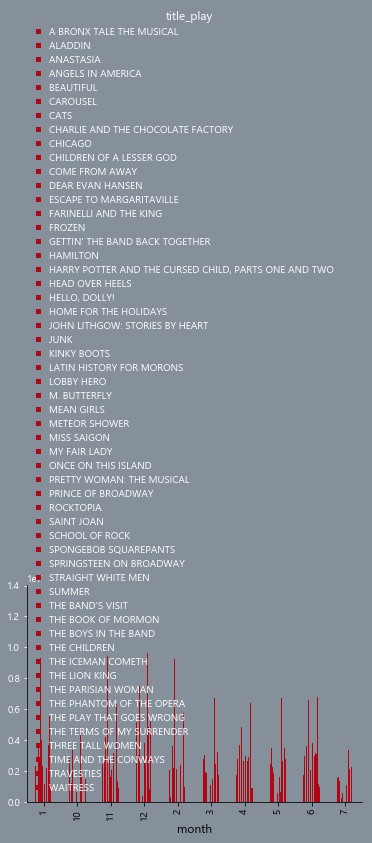

In [122]:
grosses.plot(kind='bar',x='month')

In [113]:
df.dtypes

Unnamed: 0                         int64
avg_ticket_for_this_week         float64
current_week_gross                 int32
date_previous_week                object
date_this_week                    object
difference_gross                   int32
pct_seats_sold_previous_week     float64
pct_seats_sold_this_week         float64
percentage_points_difference     float64
previous_week_gross                int32
seats_available_for_this_week      int32
seats_sold_for_this_week           int32
title_play                        object
top_ticket_for_this_week           int32
theater                           object
year                              object
month                             object
dtype: object

In [114]:
seats = df.groupby(['month','title_play']).seats_sold_for_this_week.sum().unstack().reset_index()
seats

title_play,month,A BRONX TALE THE MUSICAL,ALADDIN,ANASTASIA,ANGELS IN AMERICA,BEAUTIFUL,CAROUSEL,CATS,CHARLIE AND THE CHOCOLATE FACTORY,CHICAGO,...,THE ICEMAN COMETH,THE LION KING,THE PARISIAN WOMAN,THE PHANTOM OF THE OPERA,THE PLAY THAT GOES WRONG,THE TERMS OF MY SURRENDER,THREE TALL WOMEN,TIME AND THE CONWAYS,TRAVESTIES,WAITRESS
0,1,23288.0,40493.0,27137.0,NaN,20819.0,NaN,NaN,10953.0,22363.0,...,NaN,40565.0,18935.0,31410.0,15737.0,NaN,NaN,NaN,NaN,NaN
1,10,15670.0,26728.0,16087.0,NaN,15485.0,NaN,17516.0,17344.0,14738.0,...,NaN,27063.0,NaN,22136.0,11148.0,6252.0,NaN,9422.0,NaN,15570.0
2,11,23369.0,40857.0,25326.0,NaN,22145.0,NaN,26913.0,29858.0,21834.0,...,NaN,38989.0,19299.0,31716.0,15874.0,NaN,NaN,13855.0,NaN,NaN
3,12,30900.0,54242.0,37011.0,NaN,29269.0,NaN,40222.0,43169.0,29731.0,...,NaN,54158.0,25628.0,46142.0,20963.0,NaN,NaN,NaN,NaN,NaN
4,2,22217.0,41066.0,25744.0,4322.0,21062.0,NaN,NaN,NaN,21011.0,...,NaN,40526.0,17235.0,31672.0,15268.0,NaN,NaN,NaN,NaN,NaN
5,3,20807.0,40496.0,25830.0,27356.0,21952.0,28777.0,NaN,NaN,22976.0,...,2097.0,40286.0,5839.0,35280.0,15077.0,NaN,17454.0,NaN,NaN,NaN
6,4,19940.0,40775.0,24540.0,25650.0,19890.0,32018.0,NaN,NaN,23652.0,...,18909.0,40531.0,NaN,35739.0,14453.0,NaN,18888.0,NaN,13867.0,NaN
7,5,21076.0,40765.0,24820.0,27055.0,20404.0,30590.0,NaN,NaN,25114.0,...,21869.0,38944.0,NaN,37811.0,14991.0,NaN,18888.0,NaN,14008.0,NaN
8,6,20468.0,41071.0,25585.0,26888.0,21679.0,28738.0,NaN,NaN,23016.0,...,20012.0,40711.0,NaN,38095.0,16650.0,NaN,19677.0,NaN,10571.0,NaN
9,7,14645.0,28615.0,16464.0,9882.0,14614.0,17950.0,NaN,NaN,15638.0,...,NaN,28665.0,NaN,24874.0,10744.0,NaN,NaN,NaN,NaN,NaN


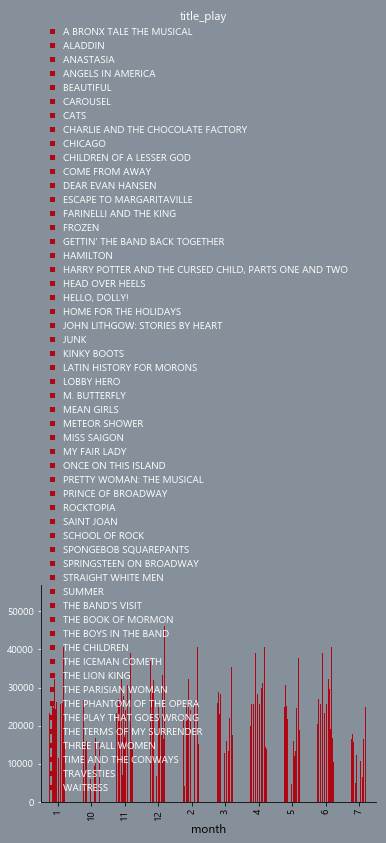

In [123]:
seats.plot(kind='bar',x='month')